In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
# Load the data
shopping = pd.read_csv('Shopping trends.csv')

In [11]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(shopping.head())

First few rows of the dataframe:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discou

In [15]:
# Display basic information about the dataframe
print("\nBasic information about the dataframe:")
print(shopping.info())


Basic information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  

In [17]:
# Display summary statistics of the dataframe
print("\nSummary statistics of the dataframe:")
print(shopping.describe())


Summary statistics of the dataframe:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [19]:
# Check for missing values
print("\nMissing values in the dataframe:")
print(shopping.isnull().sum())


Missing values in the dataframe:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


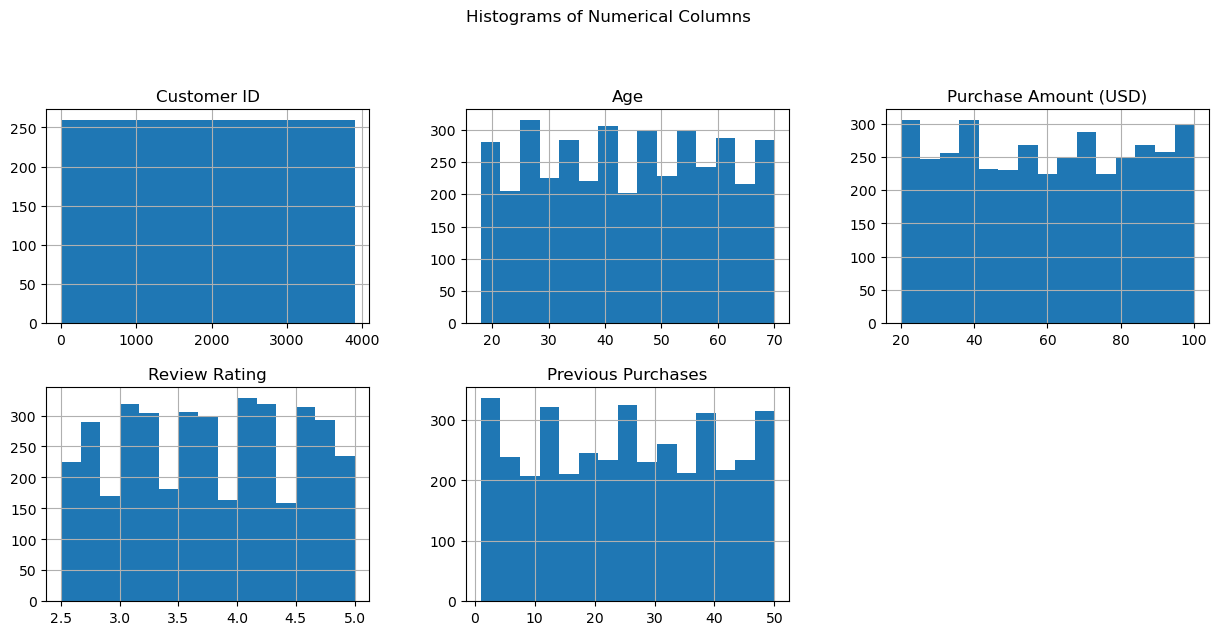

In [21]:
# Plotting histograms for numerical columns
numerical_columns = shopping.select_dtypes(include=['int64', 'float64']).columns
shopping[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

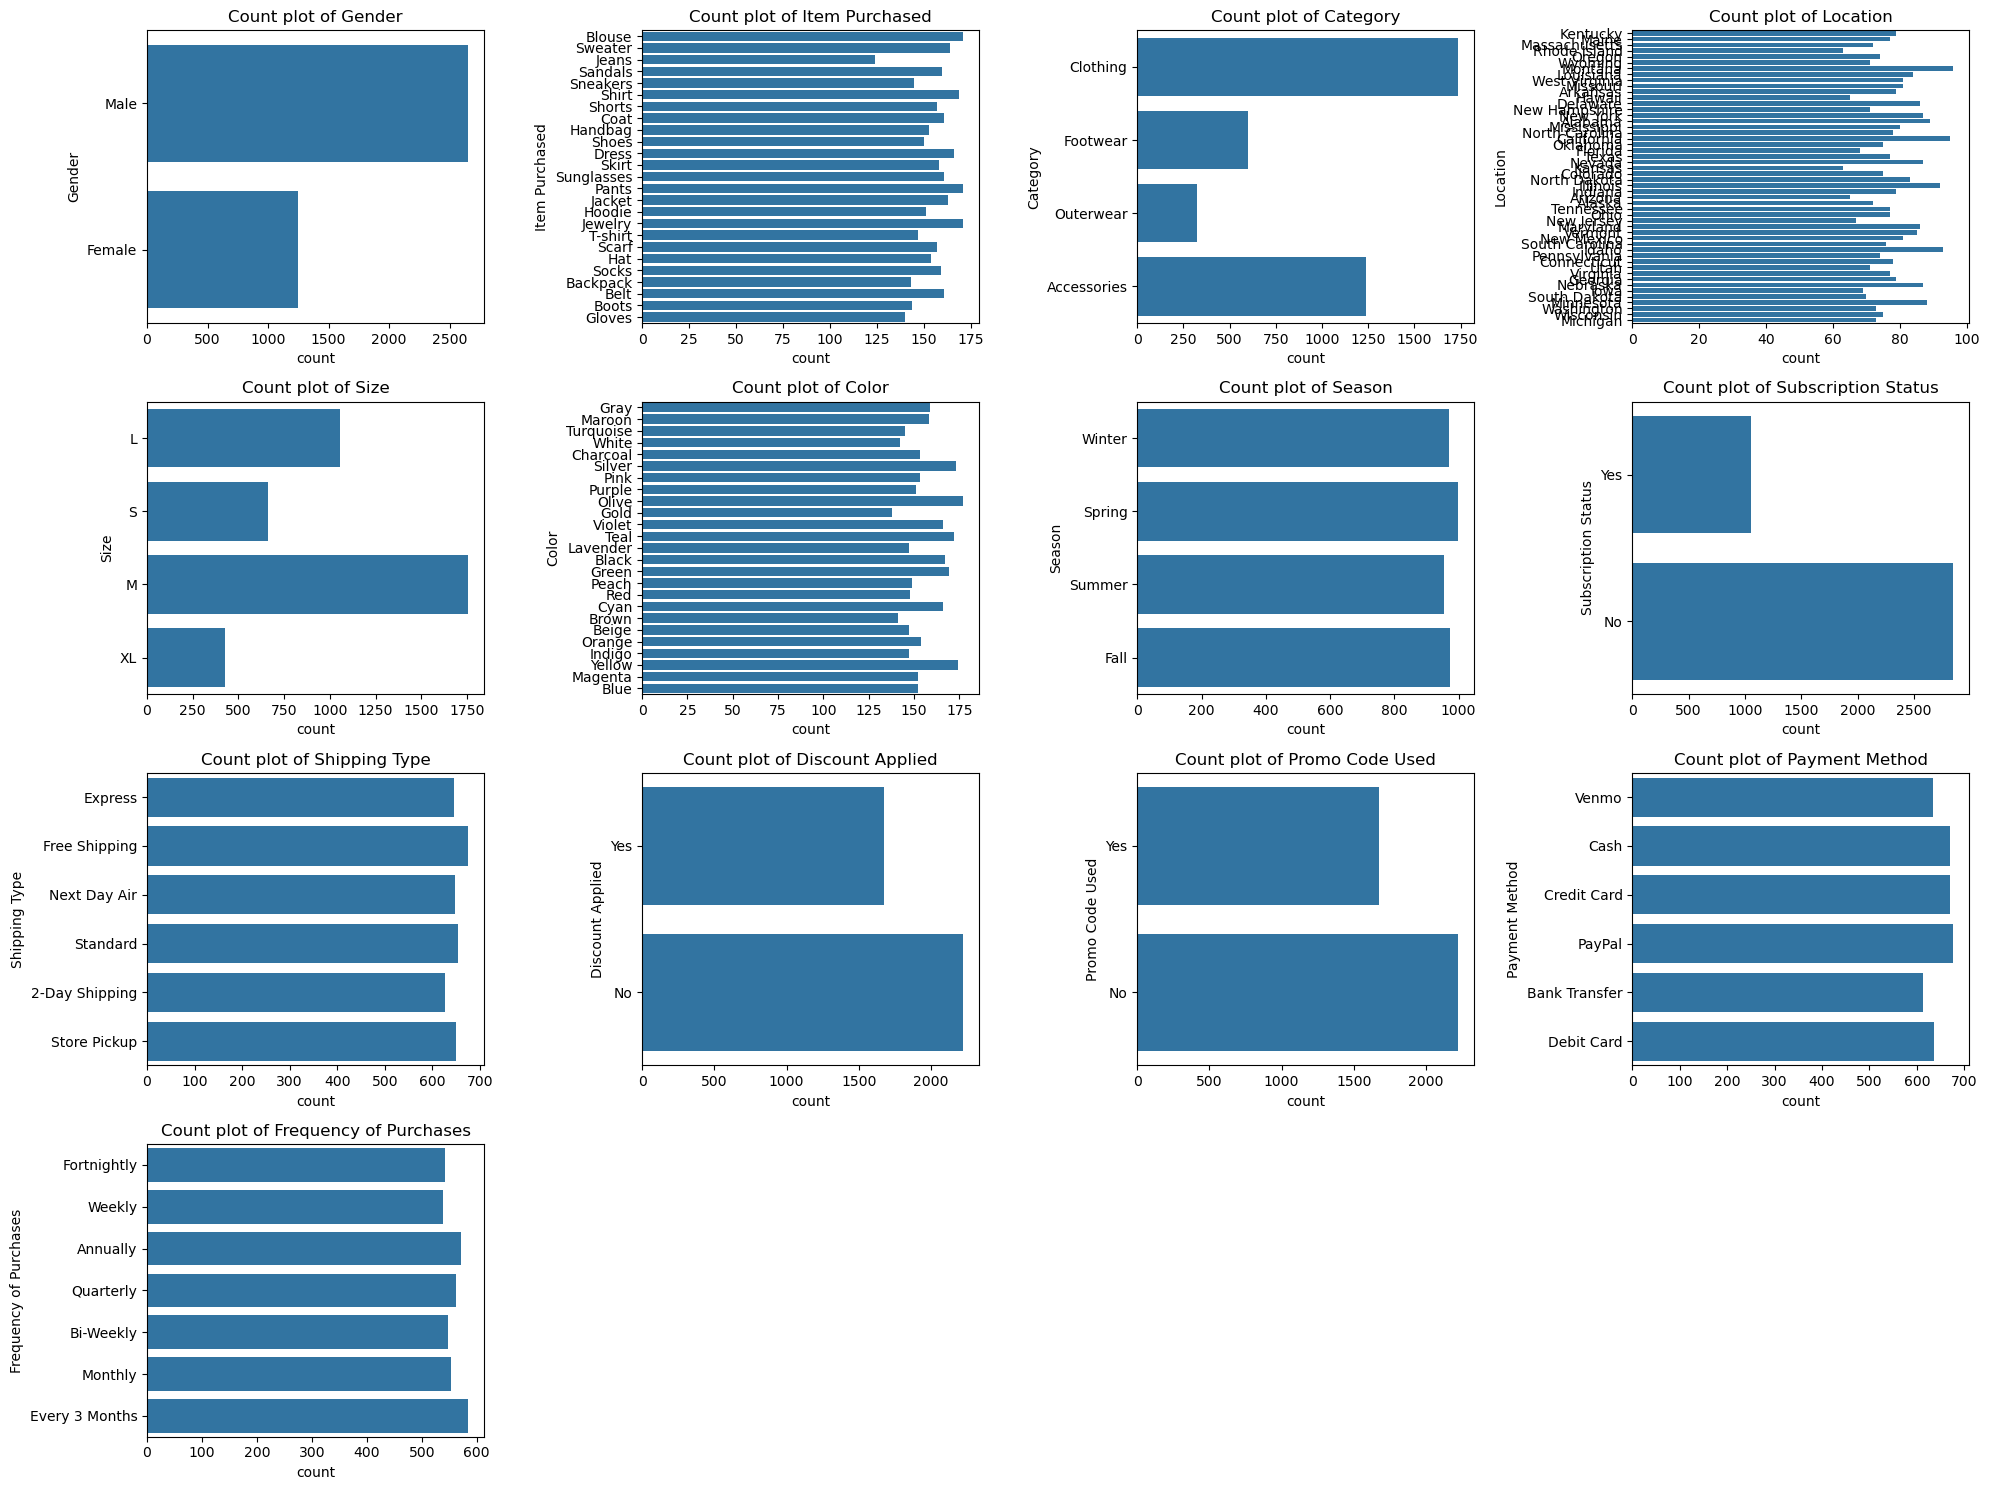

In [25]:
# Plotting count plots for categorical columns
categorical_columns = shopping.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=shopping[column])
    plt.title(f'Count plot of {column}')
plt.tight_layout()
plt.show()

C:\Users\olawu\AppData\Local\Temp\ipykernel_9852\820597046.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = shopping['Purchase Amount (USD)'].resample('M').sum()


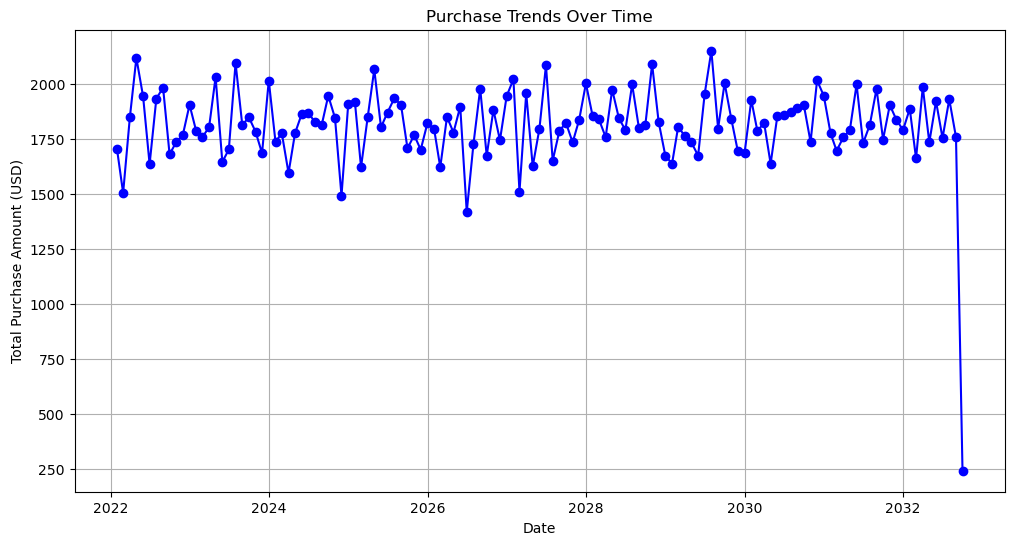

C:\Users\olawu\AppData\Local\Temp\ipykernel_9852\820597046.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_purchase_count = shopping['Customer ID'].resample('M').count()


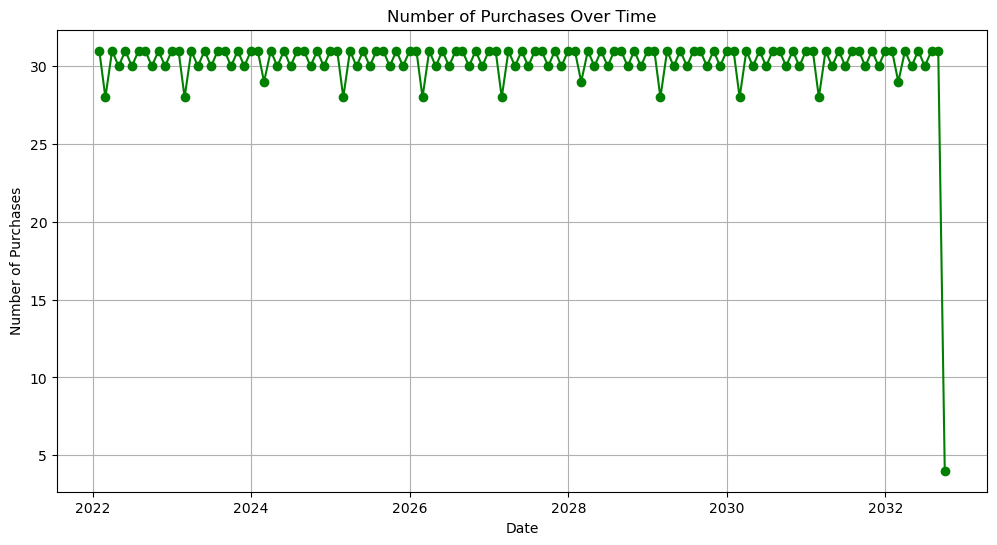

C:\Users\olawu\AppData\Local\Temp\ipykernel_9852\820597046.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_purchase_amount = shopping['Purchase Amount (USD)'].resample('M').mean()


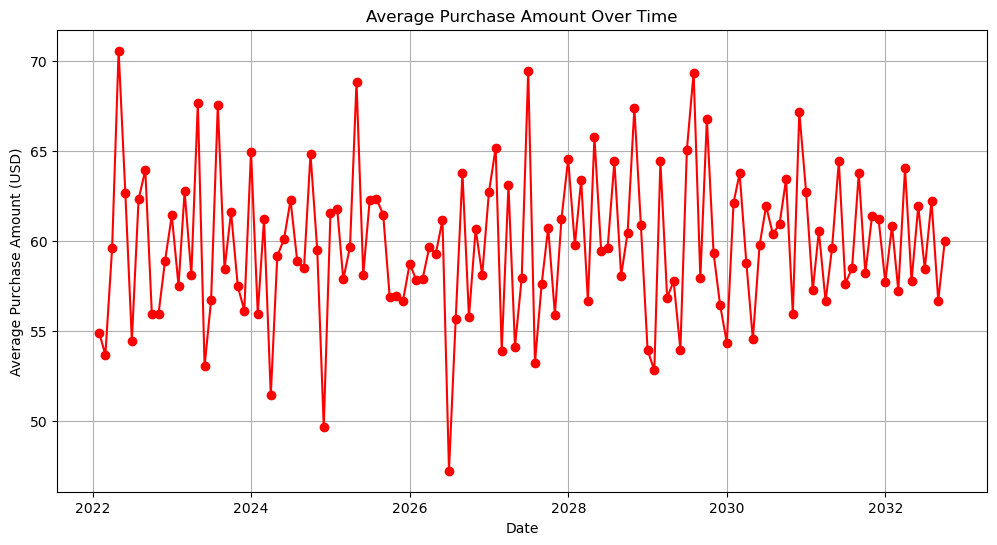

In [61]:
# Convert 'Customer ID' to string to avoid any issues with plotting
shopping['Customer ID'] = shopping['Customer ID'].astype(str)
# Create a new column 'Purchase Date' with random dates for visualization purposes
# Note: In a real scenario, you would use actual purchase dates from the dataset
shopping['Purchase Date'] = pd.date_range(start='2022-01-01', periods=len(shopping), freq='D')
# Set 'Purchase Date' as the index
shopping.set_index('Purchase Date', inplace=True)
# Resample the data by month and calculate the total purchase amount for each month
monthly_trends = shopping['Purchase Amount (USD)'].resample('M').sum()

# Plot the purchase trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends, marker='o', linestyle='-', color='b')
plt.title('Purchase Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount (USD)')
plt.grid(True)
plt.show()


# Analyze consumer purchasing patterns over time
# Resample the data by month and calculate the number of purchases for each month
monthly_purchase_count = shopping['Customer ID'].resample('M').count()

# Plot the number of purchases over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_purchase_count, marker='o', linestyle='-', color='g')
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.show()

# Analyze average purchase amount over time
monthly_avg_purchase_amount = shopping['Purchase Amount (USD)'].resample('M').mean()

# Plot the average purchase amount over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_purchase_amount, marker='o', linestyle='-', color='r')
plt.title('Average Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(True)
plt.show()



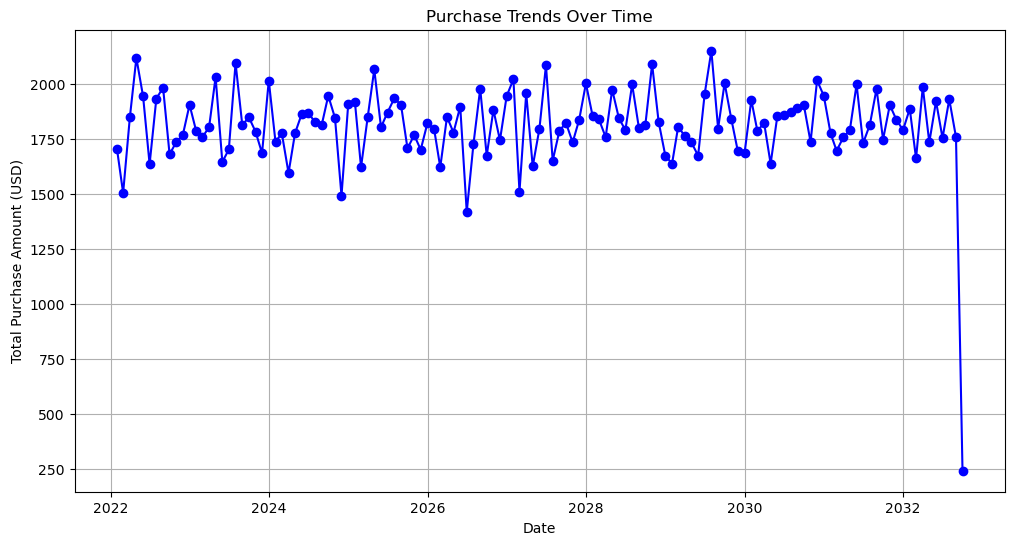

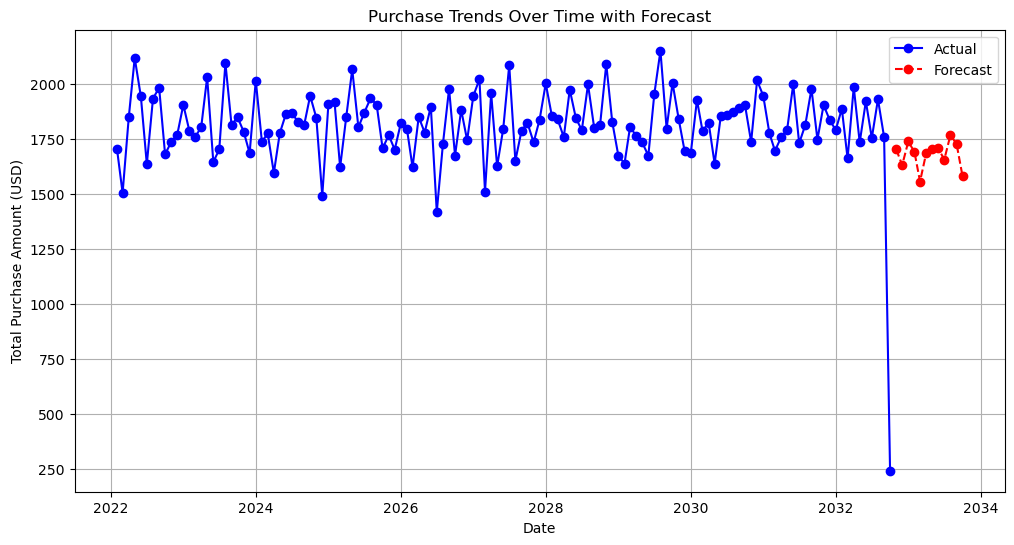

Forecasted values for the next 12 months:
2032-10-31    1701.870797
2032-11-30    1629.506278
2032-12-31    1737.567654
2033-01-31    1688.839583
2033-02-28    1555.248392
2033-03-31    1684.064786
2033-04-30    1703.105650
2033-05-31    1706.961828
2033-06-30    1654.214787
2033-07-31    1765.747624
2033-08-31    1726.807051
2033-09-30    1580.070358
Freq: ME, dtype: float64


In [43]:

# Plot the purchase trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends, marker='o', linestyle='-', color='b')
plt.title('Purchase Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount (USD)')
plt.grid(True)
plt.show()

# Predictive Analysis using Exponential Smoothing
model = ExponentialSmoothing(monthly_trends, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast for the next 12 months
forecast = fit.forecast(12)

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(forecast, marker='o', linestyle='--', color='r', label='Forecast')
plt.title('Purchase Trends Over Time with Forecast')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values
print("Forecasted values for the next 12 months:")
print(forecast)


In [45]:

# Customer Retention Model

# Convert categorical variables to dummy variables
shopping_encoded = pd.get_dummies(shopping, columns=['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season',
                                         'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
                                         'Payment Method', 'Frequency of Purchases'], drop_first=True)

# Define features and target variable for customer retention model
X = shopping_encoded.drop(['Customer ID', 'Review Rating'], axis=1)
y = shopping_encoded['Review Rating'].apply(lambda x: 1 if x >= 4 else 0)  # Assuming customers with rating >= 4 are retained

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       443
           1       0.49      0.18      0.27       337

    accuracy                           0.57       780
   macro avg       0.54      0.52      0.48       780
weighted avg       0.54      0.57      0.51       780


Confusion Matrix:
[[379  64]
 [275  62]]


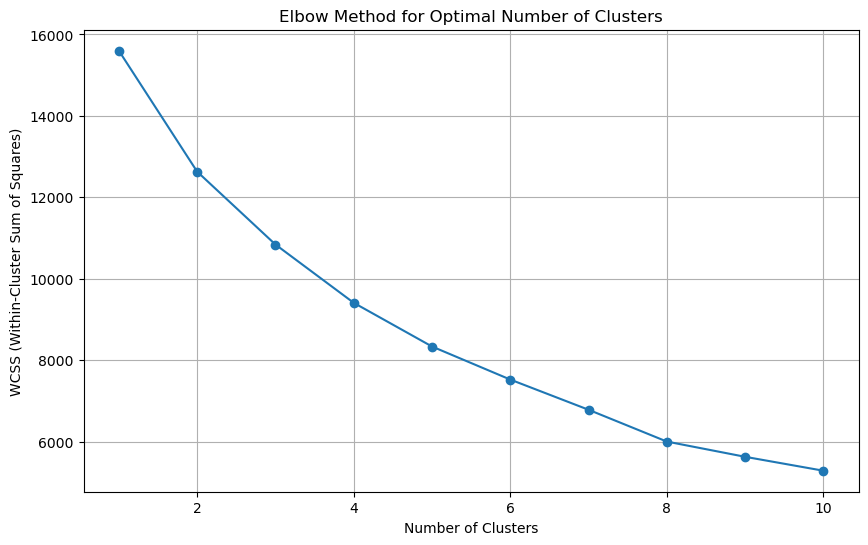

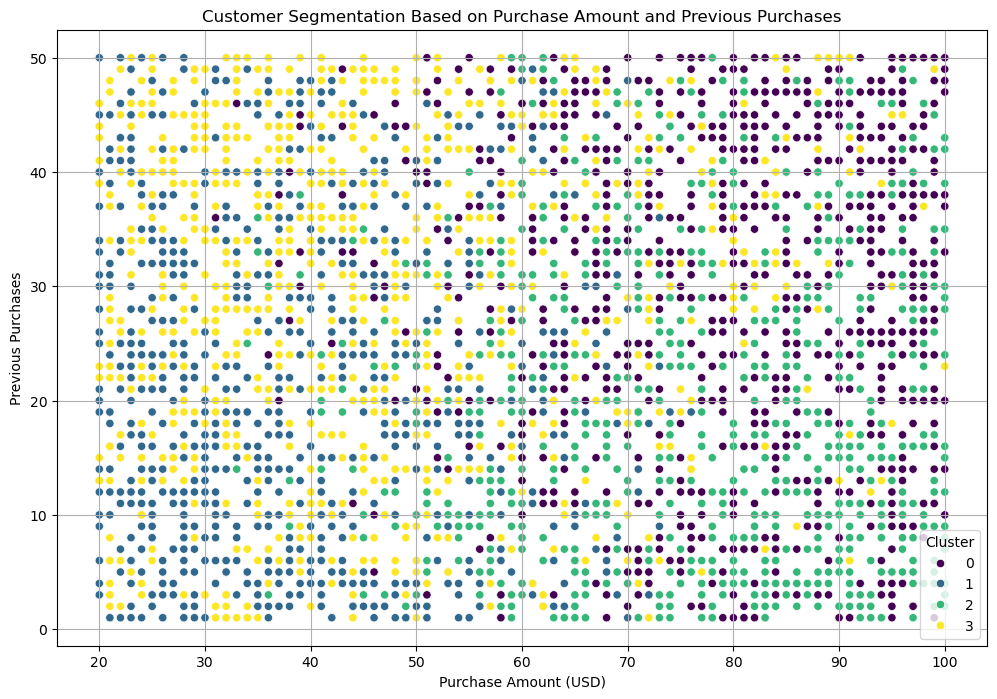

Cluster Centroids:
         Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0  51.903357              78.048830       4.339674           29.155646
1  34.914672              38.764828       4.193757           22.318418
2  32.253012              76.603505       3.299890           20.312158
3  55.461170              47.139981       3.179195           28.972196

Personalization Strategies for Each Cluster:
Cluster 0: Offer loyalty rewards and personalized discounts to retain high-value customers.
Cluster 1: Provide targeted promotions and incentives to encourage more frequent purchases.
Cluster 2: Focus on improving product quality and customer service to enhance satisfaction.
Cluster 3: Engage with customers through personalized recommendations and exclusive offers.


In [49]:

# Select relevant features for customer segmentation
features = shopping[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# From the elbow plot, let's choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
shopping['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Purchase Amount (USD)', y='Previous Purchases', hue='Cluster', data=shopping, palette='viridis')
plt.title('Customer Segmentation Based on Purchase Amount and Previous Purchases')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Previous Purchases')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_shopping = pd.DataFrame(centroids, columns=features.columns)
print("Cluster Centroids:")
print(centroid_shopping)

# Personalization Strategies based on Clusters
personalization_strategies = {
    0: "Offer loyalty rewards and personalized discounts to retain high-value customers.",
    1: "Provide targeted promotions and incentives to encourage more frequent purchases.",
    2: "Focus on improving product quality and customer service to enhance satisfaction.",
    3: "Engage with customers through personalized recommendations and exclusive offers."
}

print("\nPersonalization Strategies for Each Cluster:")
for cluster, strategy in personalization_strategies.items():
    print(f"Cluster {cluster}: {strategy}")

